# **Nauman Ali Murad**
**Reg: 2022479**

**Assingment #4**

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense

**Load the dataset**

In [12]:
# Load the dataset
df = pd.read_csv("forestfires.csv")

**Exploratory Data Analysis**

In [13]:
# Display the first few rows of the dataset
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['month', 'day'])

# Display the first few rows of the encoded dataset
df_encoded.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,False,False,False,True,False,False,False,False,False,False
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,False,True,False,False,False,False,False,False,True,False
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,False,True,False,False,False,True,False,False,False,False
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,False,False,False,True,False,False,False,False,False,False
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,False,False,False,False,False,False,True,False,False,False


In [7]:
# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['size_category'])  # Features
y = df_encoded['size_category']  # Target variable

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (517, 47)
Shape of y: (517,)


In [8]:
# Encode target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the unique classes and their encoded values
print("Encoded classes:", label_encoder.classes_)
print("Encoded values:", set(y_encoded))


Encoded classes: ['large' 'small']
Encoded values: {0, 1}


In [10]:
# Define the number of features
n_features = X_train.shape[1]

model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, input_shape=(1, n_features)))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                19600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 19651 (76.76 KB)
Trainable params: 19651 (76.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Training**

In [11]:
# Convert the input data to float32
X_train_reshaped = np.array(X_train).astype('float32')
X_test_reshaped = np.array(X_test).astype('float32')

# Reshape data for LSTM input
X_train_reshaped = X_train_reshaped.reshape((X_train_reshaped.shape[0], 1, X_train_reshaped.shape[1]))
X_test_reshaped = X_test_reshaped.reshape((X_test_reshaped.shape[0], 1, X_test_reshaped.shape[1]))

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
11/11 [==============================] - 3s 64ms/step - loss: 0.9840 - accuracy: 0.3030 - val_loss: 0.8862 - val_accuracy: 0.3735
Epoch 2/30
11/11 [==============================] - 0s 6ms/step - loss: 0.8284 - accuracy: 0.3424 - val_loss: 0.7806 - val_accuracy: 0.3735
Epoch 3/30
11/11 [==============================] - 0s 6ms/step - loss: 0.7685 - accuracy: 0.3606 - val_loss: 0.7392 - val_accuracy: 0.3735
Epoch 4/30
11/11 [==============================] - 0s 8ms/step - loss: 0.7341 - accuracy: 0.3576 - val_loss: 0.7067 - val_accuracy: 0.3735
Epoch 5/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.3636 - val_loss: 0.6398 - val_accuracy: 0.8675
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.8455 - val_loss: 0.6178 - val_accuracy: 0.8313
Epoch 7/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6199 - accuracy: 0.8303 - val_loss: 0.5913 - val_accuracy: 0.8193
Epoch 8/30
11/11 [=

**Model Evaluation**

In [14]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 7ms/step - loss: 0.1925 - accuracy: 0.9327
Test Loss: 0.19248390197753906
Test Accuracy: 0.932692289352417


**Visualization**

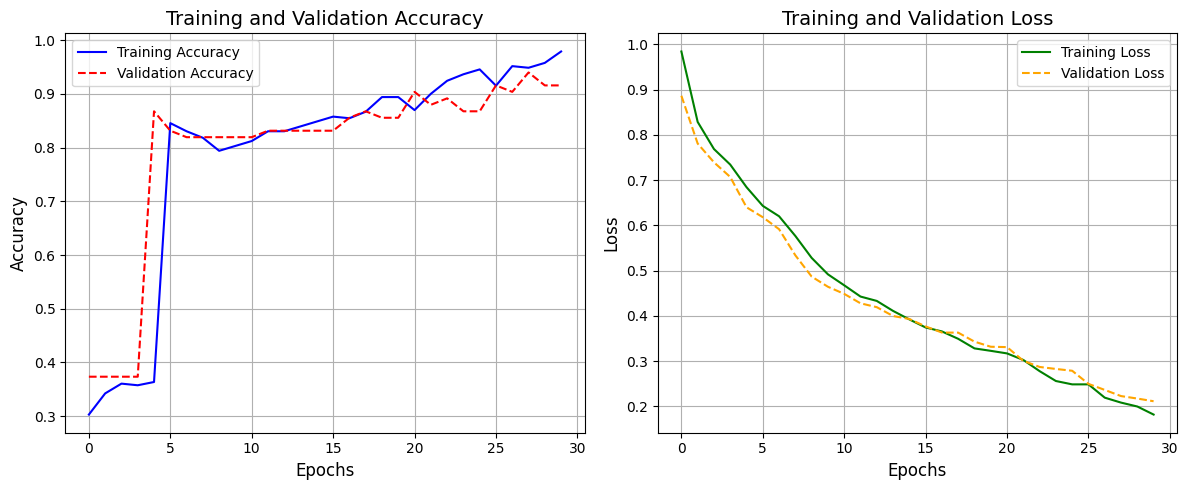

In [19]:
# Get training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation accuracy
axes[0].plot(train_acc, label='Training Accuracy', color='blue', linestyle='-')
axes[0].plot(val_acc, label='Validation Accuracy', color='red', linestyle='--')
axes[0].set_xlabel('Epochs', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Training and Validation Accuracy', fontsize=14)
axes[0].legend()
axes[0].grid(True)

# Plot training and validation loss
axes[1].plot(train_loss, label='Training Loss', color='green', linestyle='-')
axes[1].plot(val_loss, label='Validation Loss', color='orange', linestyle='--')
axes[1].set_xlabel('Epochs', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Training and Validation Loss', fontsize=14)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


**Making Predictions**

In [24]:
# Make predictions on test data
y_pred = model.predict(X_test_reshaped)

# Convert predictions to binary classes (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Convert predicted classes back to original labels
predicted_labels = label_encoder.inverse_transform(y_pred_classes.flatten())

# Display some sample predictions
print("Sample Predictions:")
for i in range(30):
    print("Predicted:", predicted_labels[i], "| True:", label_encoder.inverse_transform([y_test[i]]))

4/4 [==============================] - 0s 6ms/step
Sample Predictions:
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: large | True: ['large']
Predicted: small | True: ['large']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: large | True: ['large']
Predicted: small | True: ['small']
Predicted: small | True: ['small']
Predicted: small | 